Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read data from file, extract the columns of interest, and remove prefixes from their names.

In [3]:
df = pd.read_csv("cleaned.csv")

genres = df[df.filter(like="genre_").columns]
years = df[df.filter(like="active_").columns]
releases = df[df.filter(like="release_").columns]

genres.columns = [col.replace("genre_", "") for col in genres.columns]
years.columns = [col.replace("active_", "") for col in years.columns]
releases.columns = [col.replace("release_", "") for col in releases.columns]

Draw the plot for number of active bands playing each genre for each year.

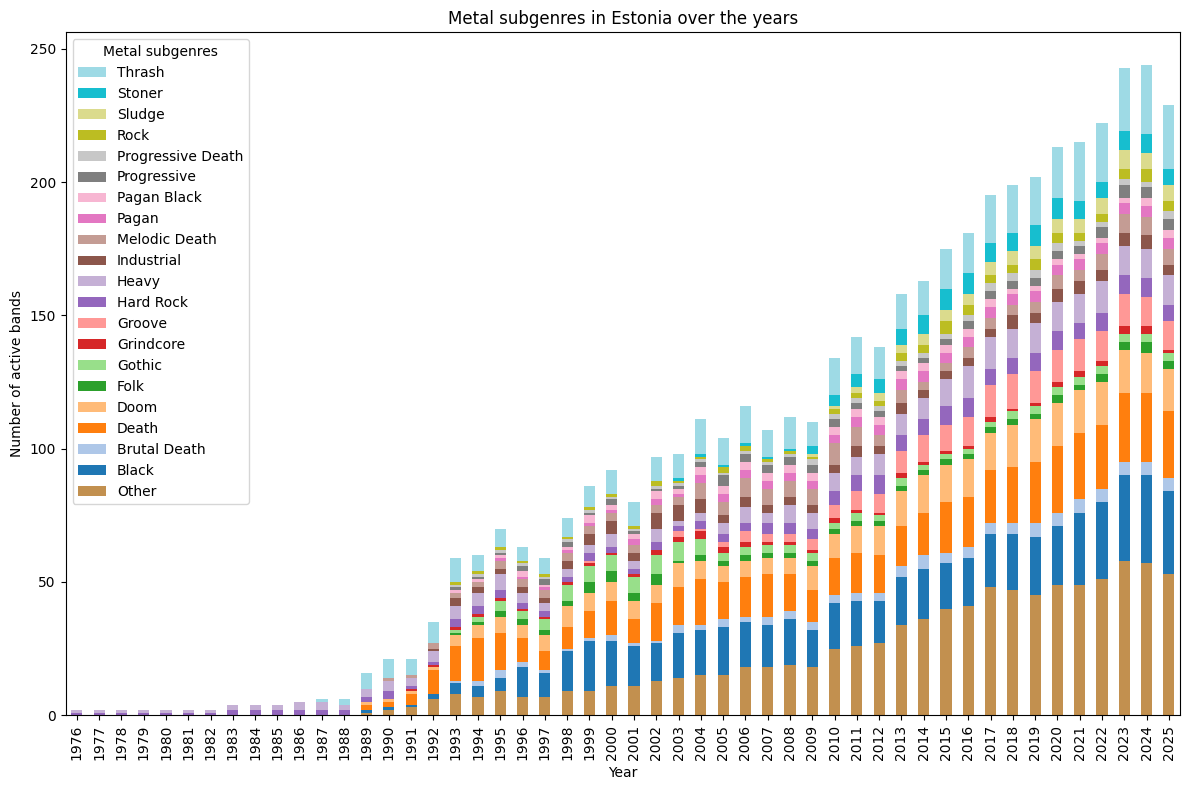

In [4]:
genres_by_year = years.T.dot(genres)

# Label smaller genres as "Other" in the plot for less clutter
threshold = 50
small_genres = genres_by_year.sum(axis=0) <= threshold

major_genres = genres_by_year.loc[:, ~small_genres].copy()
other = genres_by_year.loc[:, small_genres].sum(axis=1)

major_genres = pd.concat([other.rename("Other"), major_genres], axis=1)

colours = list(plt.cm.tab20.colors)
colours.insert(0, "#c2904f")

ax = major_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                       title="Bands by metal subgenres in Estonia over the years",
                       xlabel="Year", ylabel="Number of active bands")
# Reverse legend order for ease of reading
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Metal subgenres")
plt.tight_layout()
#plt.savefig("genretimeline.pdf")
plt.show()

Draw plot showing relative share of active bands playing each genre for each year.

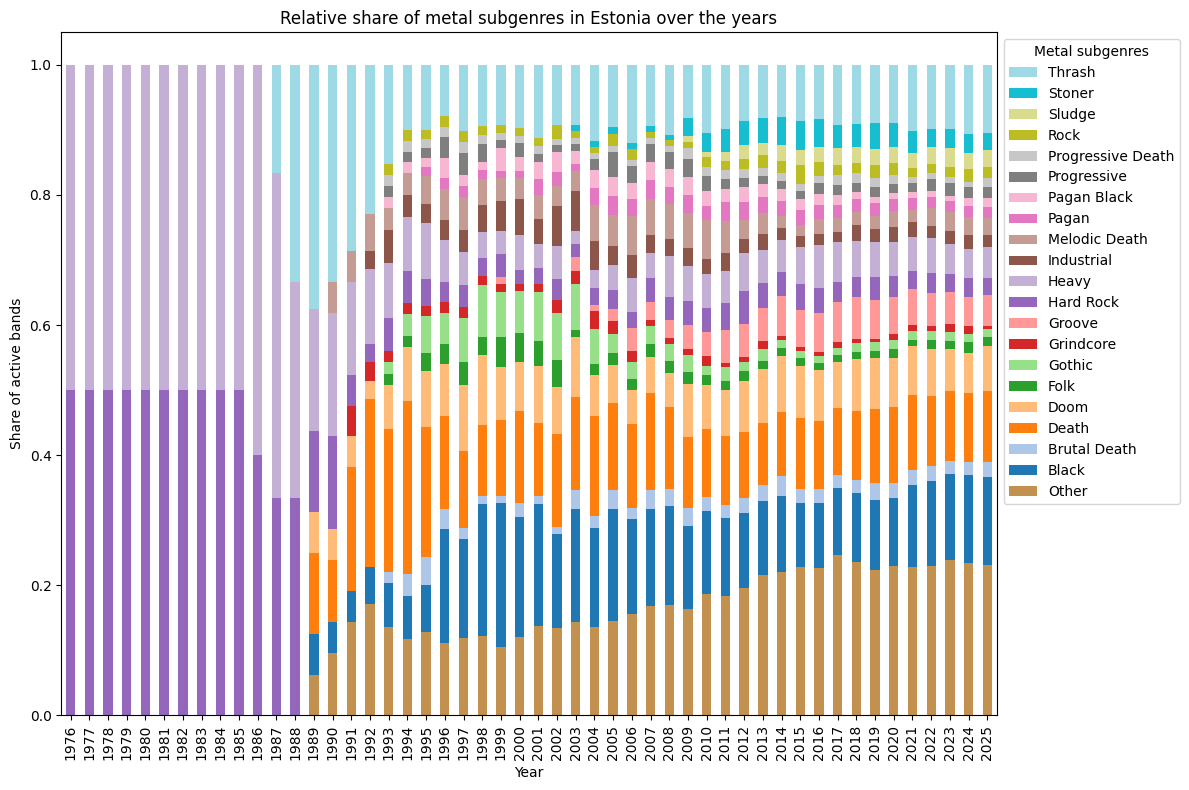

In [5]:
relative_genres = major_genres.div(major_genres.sum(axis=1), axis=0)

ax = relative_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                       title="Relative share of bands by metal subgenres in Estonia over the years",
                       xlabel="Year", ylabel="Share of active bands")
# Reverse legend order for ease of reading
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Metal subgenres", bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.savefig("relativegenretimeline.pdf")
plt.show()

Draw the same plots for releases.

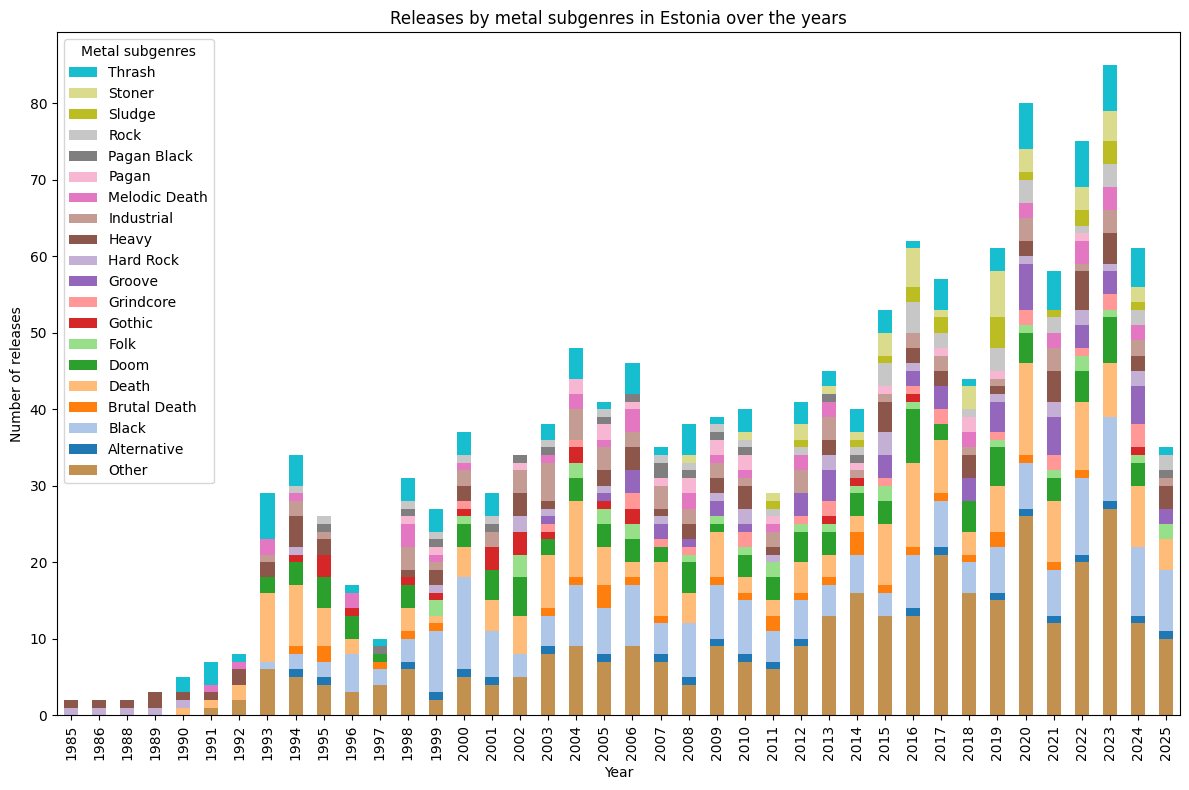

In [12]:
genres_by_year_releases = releases.T.dot(genres)

# Label smaller genres as "Other" in the plot for less clutter
threshold = 16
small_genres = genres_by_year_releases.sum(axis=0) <= threshold

major_genres = genres_by_year_releases.loc[:, ~small_genres].copy()
other = genres_by_year_releases.loc[:, small_genres].sum(axis=1)

major_genres = pd.concat([other.rename("Other"), major_genres], axis=1)

colours = list(plt.cm.tab20.colors)
colours.insert(0, "#c2904f")

ax = major_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                       title="Releases by metal subgenres in Estonia over the years",
                       xlabel="Year", ylabel="Number of releases")
# Reverse legend order for ease of reading
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Metal subgenres")
plt.tight_layout()
#plt.savefig("releasestimeline.pdf")
plt.show()

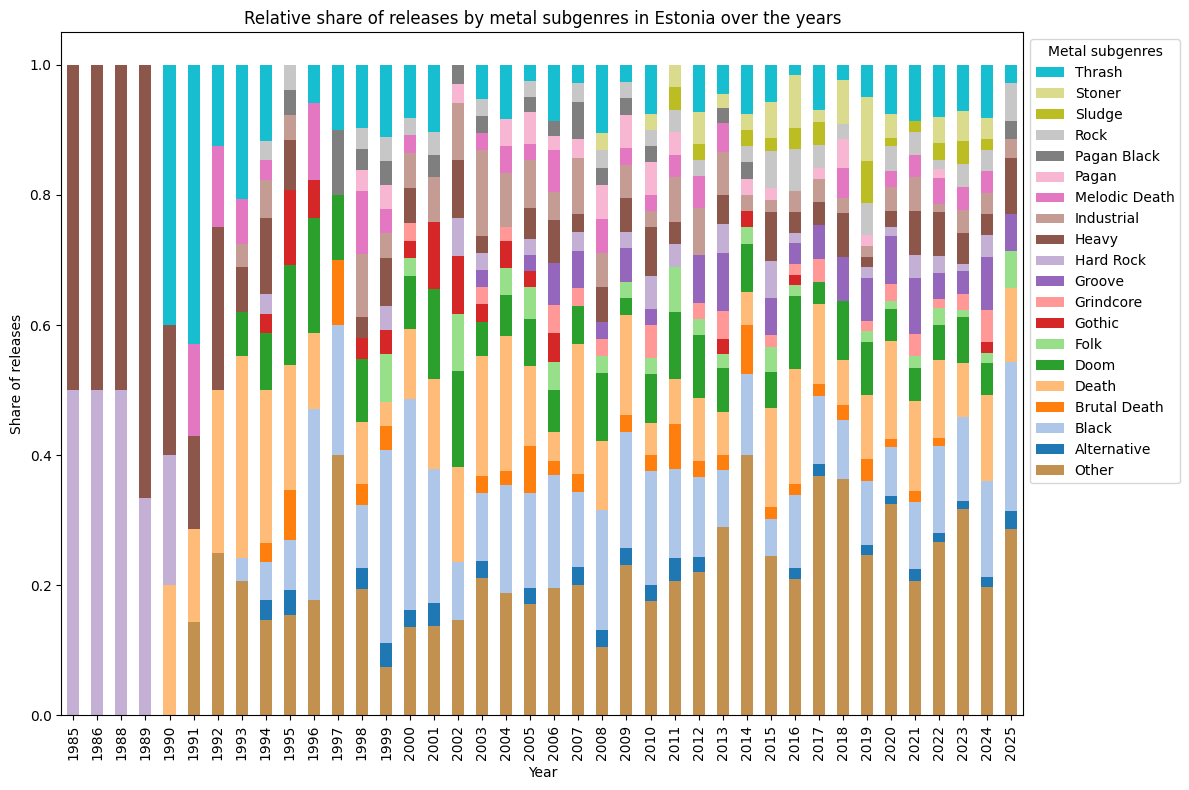

In [14]:
relative_genres = major_genres.div(major_genres.sum(axis=1), axis=0)

ax = relative_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                       title="Relative share of releases by metal subgenres in Estonia over the years",
                       xlabel="Year", ylabel="Share of releases")
# Reverse legend order for ease of reading
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Metal subgenres", bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.savefig("relativereleasestimeline.pdf")
plt.show()

The same plots for formed bands.

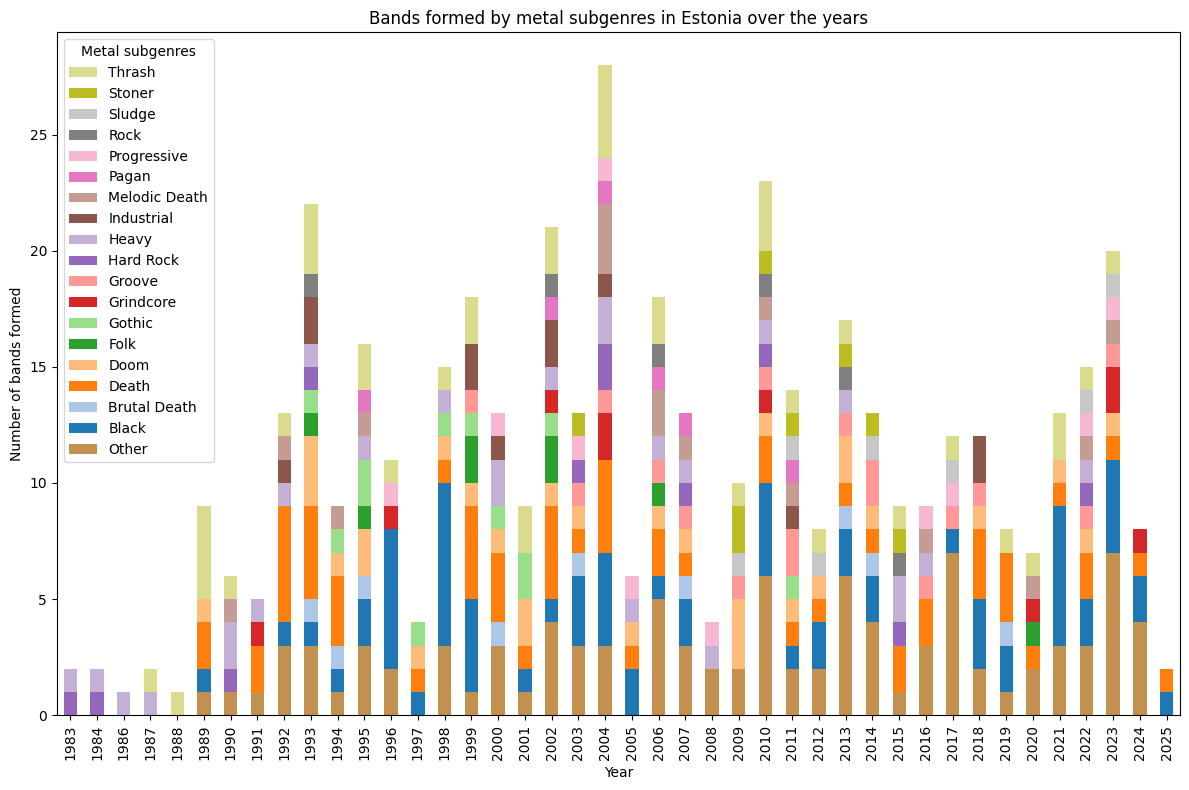

In [27]:
formed_by_year = pd.DataFrame({year: genres.loc[i].sum() for year, i in df.groupby("formed").groups.items()}).T

# Label smaller genres as "Other" in the plot for less clutter
threshold = 5
small_genres = formed_by_year.sum(axis=0) <= threshold

major_genres = formed_by_year.loc[:, ~small_genres].copy()
other = formed_by_year.loc[:, small_genres].sum(axis=1)

major_genres = pd.concat([other.rename("Other"), major_genres], axis=1)

colours = list(plt.cm.tab20.colors)
colours.insert(0, "#c2904f")
ax = major_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                       title="Bands formed by metal subgenres in Estonia over the years",
                       xlabel="Year", ylabel="Number of bands formed")
# Reverse legend order for ease of reading
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Metal subgenres")
plt.tight_layout()
#plt.savefig("formedtimeline.pdf")
plt.show()

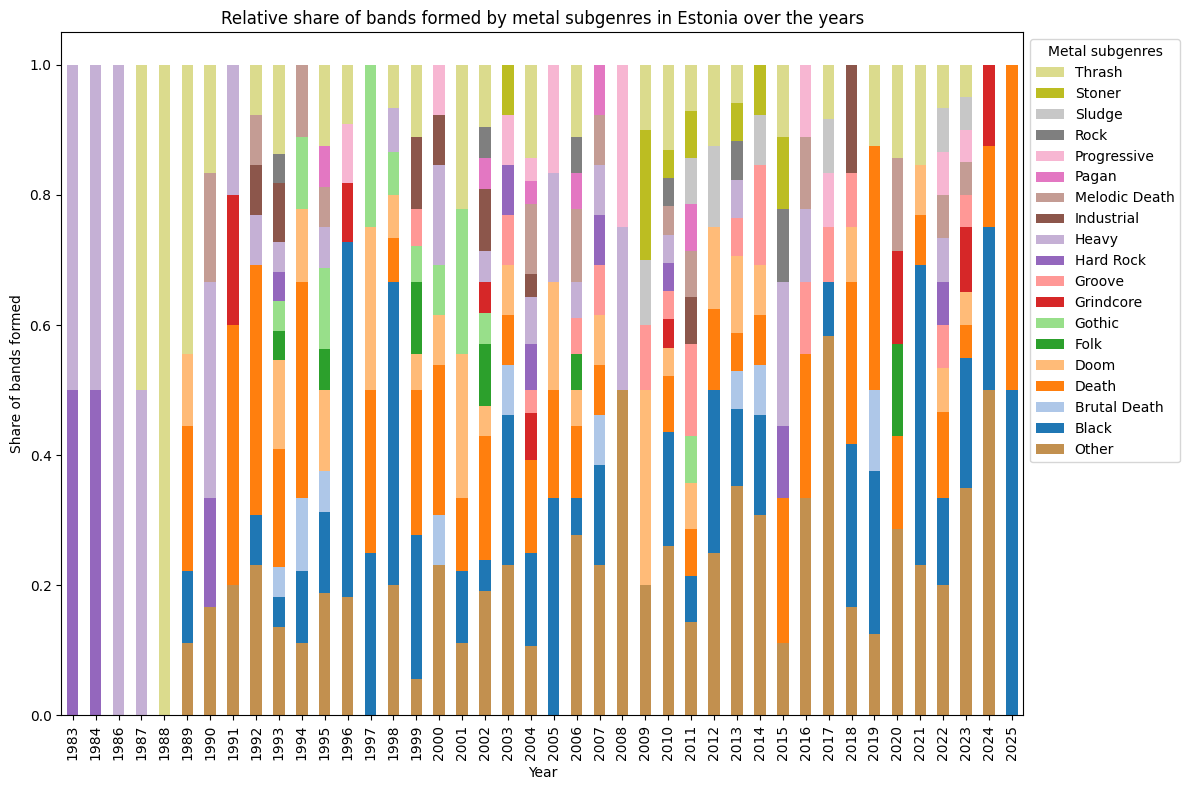

In [28]:
relative_genres = major_genres.div(major_genres.sum(axis=1), axis=0)

ax = relative_genres.plot(kind="bar", stacked=True, figsize=(12, 8), color=colours,
                       title="Relative share of bands formed by metal subgenres in Estonia over the years",
                       xlabel="Year", ylabel="Share of bands formed")
# Reverse legend order for ease of reading
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title="Metal subgenres", bbox_to_anchor=(1, 1))
plt.tight_layout()
#plt.savefig("relativeformedtimeline.pdf")
plt.show()